In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.a2c import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic
from networks.a2c_lstm.actor import ActorLSTM
from networks.a2c_lstm.critic import CriticLSTM

import gym
import matplotlib.pyplot as plt
import torch

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 50
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

actor_model = ActorLSTM(
    state_dim=batch_dur*3+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*3+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.00001),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.00001),
    hyprprms={
        'gamma': 0.995,
    },
    log_freq=1,
    p_net_type='lstm',
    c_net_type='nn',
    load_models=False,
    mdl_pth='../models/a2c_al_cn',
)

In [2]:
a2c.run(5000)


Ep: 0 | TS: 19970 | L: 0.585 | R: -28.22 | P: -12.04 | R.Avg P: -12.04 | NW: 87.96 | R.Avg NW: 87.96 | R.U: 156
Ep: 1 | TS: 39940 | L: 0.585 | R: -19.81 | P: 12.13 | R.Avg P: 0.05 | NW: 112.13 | R.Avg NW: 100.04 | R.U: 177
Ep: 2 | TS: 59910 | L: 0.589 | R: -11.7 | P: 36.99 | R.Avg P: 12.36 | NW: 136.99 | R.Avg NW: 112.36 | R.U: 198
Ep: 3 | TS: 79880 | L: 0.585 | R: -15.71 | P: 25.25 | R.Avg P: 15.58 | NW: 125.25 | R.Avg NW: 115.58 | R.U: 203
Ep: 4 | TS: 99850 | L: 0.592 | R: -22.45 | P: 2.79 | R.Avg P: 13.02 | NW: 102.79 | R.Avg NW: 113.02 | R.U: 200
Ep: 5 | TS: 119820 | L: 0.598 | R: -17.35 | P: 16.3 | R.Avg P: 13.57 | NW: 116.3 | R.Avg NW: 113.57 | R.U: 202
Ep: 6 | TS: 139790 | L: 0.605 | R: -22.44 | P: 3.23 | R.Avg P: 12.09 | NW: 103.23 | R.Avg NW: 112.09 | R.U: 199
Ep: 7 | TS: 159760 | L: 0.615 | R: -21.45 | P: 4.65 | R.Avg P: 11.16 | NW: 104.65 | R.Avg NW: 111.16 | R.U: 198
Ep: 8 | TS: 179730 | L: 0.61 | R: -16.86 | P: 19.94 | R.Avg P: 12.14 | NW: 119.94 | R.Avg NW: 112.14 | R.U:

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/vinay/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/78/_bz_v2_103ld252mxn9ml9c00000gn/T/ipykernel_6355/2174834756.py", line 1, in <module>
    a2c.run(5000)
  File "/Users/vinay/code/git/smart-broker/notebooks/../agents/a2c.py", line 283, in run
    ep_loss, ep_reward, profit, bal, units_held, net_worth = self.train()
  File "/Users/vinay/code/git/smart-broker/notebooks/../agents/a2c.py", line 159, in train
    actor_loss.backward(retain_graph=True)
  File "/Users/vinay/miniforge3/lib/python3.9/site-packages/torch/_tensor.py", line 307, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
  File "/Users/vinay/miniforge3/lib/python3.9/site-packages/torch/autograd/__init__.py", line 154, in backward
    Variable._execution_engine.run_backward(
KeyboardInterrupt

During 

TypeError: object of type 'NoneType' has no len()

/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


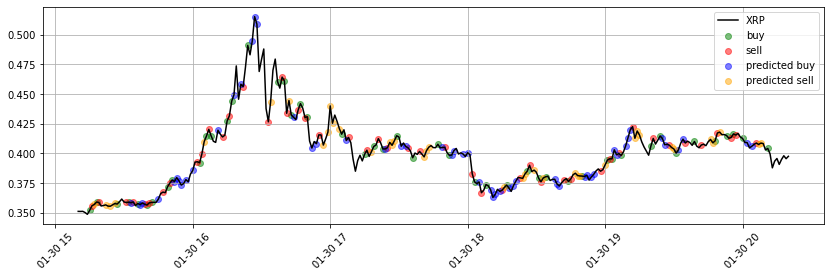

Avg.Rewards: -23.2 | Tot.Profit: -1283.59 | Avg.Profit: -4.28 | Avg.Units: 130 


(deque([-0.03,
        -10,
        -10,
        0.89,
        -10,
        -100.0,
        -100.0,
        -10,
        -100.0,
        -10,
        -100.0,
        -10,
        0.76,
        1.3,
        1.95,
        1.26,
        -10,
        1.22,
        -10,
        -10,
        -100.0,
        1.26,
        -10,
        -10,
        -10,
        1.23,
        -10,
        1.51,
        1.55,
        1.51,
        -10,
        3.63,
        -10,
        -100.0,
        4.13,
        -10,
        4.98,
        -10,
        -10,
        -10,
        -10,
        4.14,
        -10,
        4.55,
        6.35,
        -10,
        9.15,
        -10,
        9.39,
        -10,
        -10,
        11.55,
        -10,
        12.84,
        11.59,
        11.32,
        -10,
        13.23,
        -10,
        -100.0,
        12.38,
        -10,
        13.67,
        -10,
        21.27,
        14.09,
        -10,
        -10,
        -100.0,
        16.86,
        14.97,
        -10

In [8]:
a2c.evaluate(start_dt='2021-01-30 15:15', duration=300, show_logs=False, show_pred=True)

## Visualizations

### Training 

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

### Evaluation

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.eval_logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [ ]:
# torch.save(a2c.actor.state_dict(), '../models/a2c_cl_an/actor')
# torch.save(a2c.critic.state_dict(), '../models/a2c_cl_an/critic')

In [ ]:
import pickle
from datetime import datetime

temp = dict(a2c.logs)
with open(f"../pickles/a2c_logs_{datetime.now()}.pickle","wb") as f:
    pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)

### Observations

- A2C performs well when actor is chained with LSTM and critic with Neural Network
- If the actor is chained with Neural Network we dont seem to learn the task